*importing libraries*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
data = pd.read_csv("C:/Users/SHIVAM GHUGE/Downloads/daily-total-female-births.csv",index_col='Date',parse_dates=True)

In [53]:
data.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


# **Linear Regression**

*Converting Data for Machine Learning model*

In [ ]:
# time lags
T = 3

for i in range(1,T+1):
  data[f'lag_{i}'] = data['Births'].shift(i)


In [ ]:
data.head()

,Births,lag_1,lag_2,lag_3
Date,,,,
1959-01-01,35,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN
1959-01-03,30,32.0,35.0,NaN
1959-01-04,31,30.0,32.0,35.0
1959-01-05,44,31.0,30.0,32.0


In [ ]:
data.dropna(inplace=True)

<Axes: xlabel='Date'>

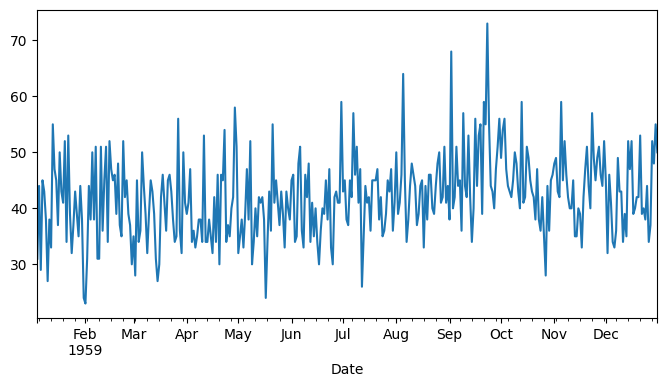

In [ ]:
data['Births'].plot(figsize=(8,4))

# data has seasonal pattern and some trend as well

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(data['Births'])

# p-value is very small making data stationary

(-4.863334109533298,
 4.1082136787923664e-05,
 6,
 355,
 {'1%': -3.448905534655263,
  '5%': -2.8697161816205705,
  '10%': -2.5711258103550882},
 2323.225772970779)

*splitting data*

In [ ]:
X = data.drop('Births',axis=1)
y = data['Births']

In [ ]:
X

In [ ]:
test_size = int(0.2*len(data))

X_train = X.iloc[:-test_size]
X_test = X.iloc[-test_size:]

y_train = y.iloc[:-test_size]
y_test = y.iloc[-test_size:]

In [ ]:
train_idx = data.index <= X_train.index[-1]
test_idx = data.index > X_train.index[-1]

#*Linear Regression*

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model = LinearRegression()

***one step prediction***

In [ ]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
linear_model.score(X_test,y_test)

0.06488961299786722

In [ ]:
pred = linear_model.predict(X_test)

In [ ]:
pred

array([42.17300203, 41.29665301, 42.32807007, 41.49466162, 40.80832237,
       41.07025767, 40.38900122, 38.89808942, 40.43473513, 40.27936698,
       41.91894287, 42.49928683, 43.45847825, 43.87954335, 43.10627358,
       42.4088684 , 44.76085247, 44.06808092, 44.84528976, 43.71996438,
       42.88147313, 41.80347655, 41.37047355, 42.07734976, 40.92057254,
       40.22972236, 40.46486582, 40.79274551, 39.99923889, 40.83351932,
       42.19164399, 43.87503242, 43.40940549, 42.29544615, 44.29275868,
       44.41285862, 43.96689668, 43.76073819, 44.24906883, 43.85726244,
       43.15243029, 43.98015573, 43.49603591, 41.13328602, 41.74859808,
       41.53717938, 40.71513696, 39.56536391, 39.54891508, 41.93015786,
       42.39867446, 42.57383028, 40.73537381, 40.67306837, 39.97536309,
       42.68027474, 43.29526032, 44.62966024, 42.68316441, 41.86157117,
       41.52349752, 41.77960075, 43.71211461, 42.48689976, 41.92053776,
       40.86365001, 41.71525125, 40.53910916, 40.40211121, 42.58

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test,pred)**0.5

6.253332985146852

In [ ]:
data.loc[test_idx,'forecast'] = pred

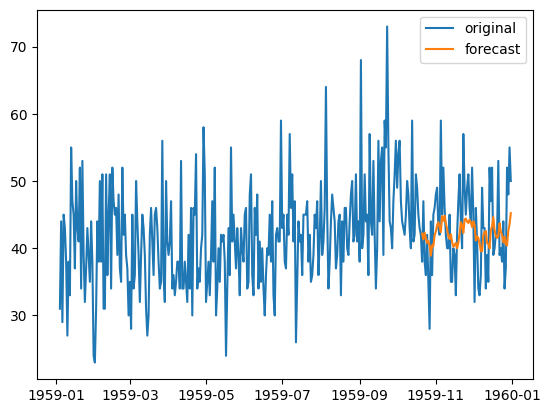

In [ ]:
plt.plot(data.index,data['Births'],label='original')
plt.plot(data.index,data['forecast'],label='forecast')
plt.legend()

***multistep prediction***

In [ ]:
X_train_ = np.array(X_train)
y_train_ = np.array(y_train)

In [ ]:
linear_model.fit(X_train_,y_train_)

LinearRegression()

In [ ]:
predictions = []

last_x = X_test.iloc[0].values

while len(predictions)<test_size:
  pred = linear_model.predict(last_x.reshape(1,-1))[0]
  predictions.append(pred)

  last_x = np.roll(last_x,-1)
  last_x[-1] = pred

In [ ]:
predictions

In [ ]:
data.loc[test_idx,'multistep'] = predictions

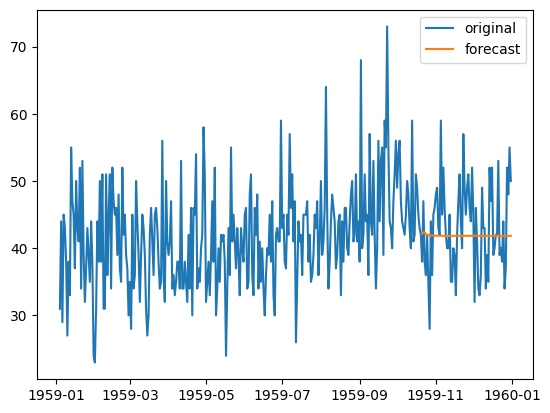

In [ ]:
plt.plot(data.index,data['Births'],label='original')
plt.plot(data.index,data['multistep'],label='forecast')
plt.legend()

# one-step is better than multistep

# *Random Forest*

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
help(RandomForestRegressor)

In [ ]:
n_estimators = [50,100,150,200]
max_depth = [5,7,10,12]
min_samples_split = [2,3,4,5]

param_grid = {'n_estimators':n_estimators,'max_depth':max_depth,'min_samples_split':min_samples_split}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_model = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,cv=5)

In [ ]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 7, 10, 12],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 200]})

In [ ]:
grid_model.score(X_test,y_test)

0.01250741649237419

In [ ]:
grid_model.best_params_

{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}

In [ ]:
pr = grid_model.predict(X_test)

In [ ]:
data.loc[test_idx,'randomforest'] = pr

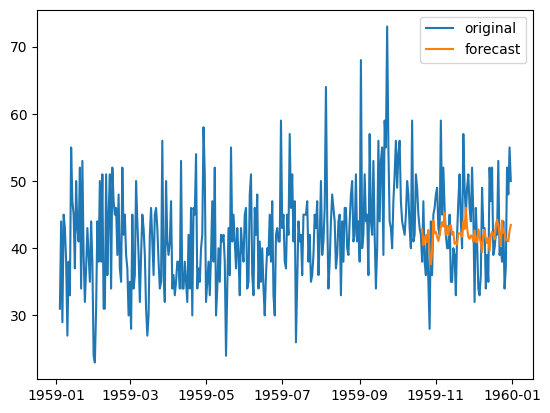

In [ ]:
plt.plot(data.index,data['Births'],label='original')
plt.plot(data.index,data['randomforest'],label='forecast')
plt.legend()

# *ARIMA*

In [ ]:
tsize = int(0.2*len(data))

train = data.iloc[:-tsize]
test = data.iloc[-tsize:]

In [ ]:
train_idx = data.index <= train.index[-1]
test_idx = data.index > train.index[-1]

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(data['Births'])

# p-value is very small which shows data is stationary

(-4.808291253559765,
 5.2434129901498554e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 2343.8290926464197)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

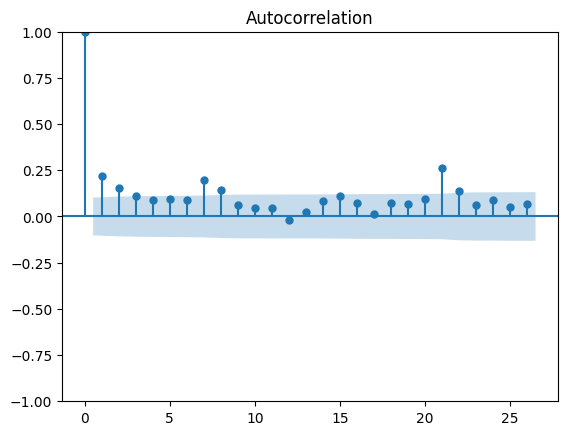

In [ ]:
plot_acf(data['Births']);

# q = 1,7 looks suitable

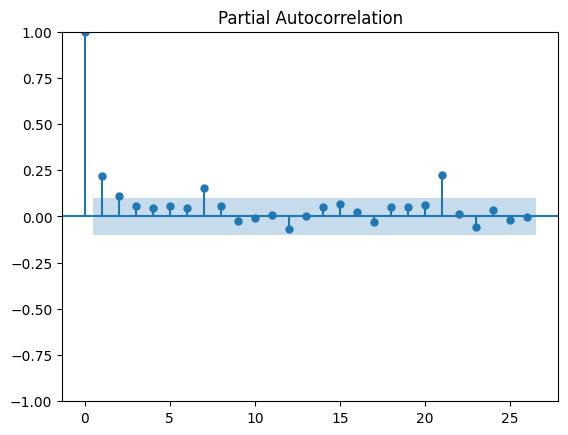

In [ ]:
plot_pacf(data['Births']);

# p =1,7 looks suitable

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

***ARIMA(1,0,1)***

In [ ]:
arima_model = ARIMA(train['Births'],order=(1,0,1))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
model_fit = arima_model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                  292
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -988.202
Date:                Wed, 28 Aug 2024   AIC                           1984.404
Time:                        18:16:31   BIC                           1999.111
Sample:                    01-01-1959   HQIC                          1990.295
                         - 10-19-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.2332      4.542      9.298      0.000      33.331      51.135
ar.L1          0.9932      0.016     61.009      0.000       0.961       1.025
ma.L1         -0.9447      0.041    -23.314      0.000      -1.024      -0.865
sigma2        50.7702      3.859     13.155      0.000      43.206      58.335
===================================================================================
Ljung-Box (L1) (Q):                   1.19   Jarque-Bera (JB):                21.80
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.57
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
arima_forcast = model_fit.forecast(tsize)

In [ ]:
data.loc[train_idx,'fitted values'] = model_fit.fittedvalues.to_numpy()
data.loc[test_idx,'forecast'] = arima_forcast.to_numpy()

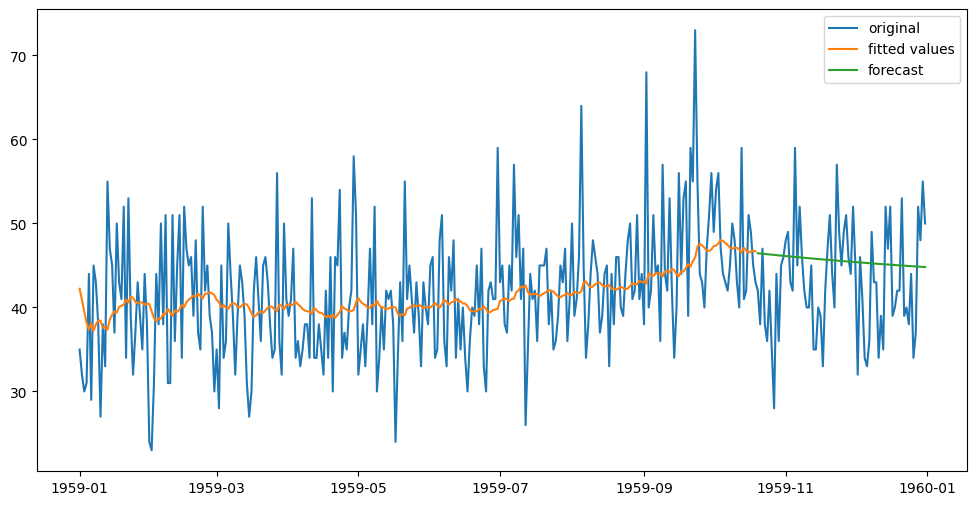

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data.index,data['Births'],label='original')
plt.plot(data.index,data['fitted values'],label='fitted values')
plt.plot(data.index,data['forecast'],label='forecast')
plt.legend()

# arima(1,1) model is not able to handle fluctuations

***ARIMA(7,0,1)***

In [ ]:
arima_model_2 = ARIMA(train['Births'],order=(7,0,1))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
model_fit_ = arima_model_2.fit()

In [ ]:
model_fit_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                  292
Model:                 ARIMA(7, 0, 1)   Log Likelihood                -985.391
Date:                Wed, 28 Aug 2024   AIC                           1990.782
Time:                        18:17:01   BIC                           2027.549
Sample:                    01-01-1959   HQIC                          2005.509
                         - 10-19-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6510      1.323     31.486      0.000      39.058      44.244
ar.L1          0.6359      0.200      3.178      0.001       0.244       1.028
ar.L2         -0.0018      0.084     -0.021      0.983      -0.166       0.162
ar.L3         -0.0097      0.073     -0.133      0.894      -0.153       0.134
ar.L4          0.0116      0.075      0.156      0.876      -0.135       0.158
ar.L5          0.0314      0.078      0.405      0.685      -0.121       0.183
ar.L6          0.0059      0.079      0.075      0.940      -0.148       0.160
ar.L7          0.1659      0.072      2.311      0.021       0.025       0.307
ma.L1         -0.5172      0.190     -2.722      0.006      -0.890      -0.145
sigma2        49.8691      4.277     11.659      0.000      41.486      58.253
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                18.29
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.55
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
data.loc[train_idx,'ARIMA(7,1) fitted values'] = model_fit_.fittedvalues.to_numpy()
data.loc[test_idx,'ARIMA(7,1) forecast'] = model_fit_.forecast(tsize).to_numpy()

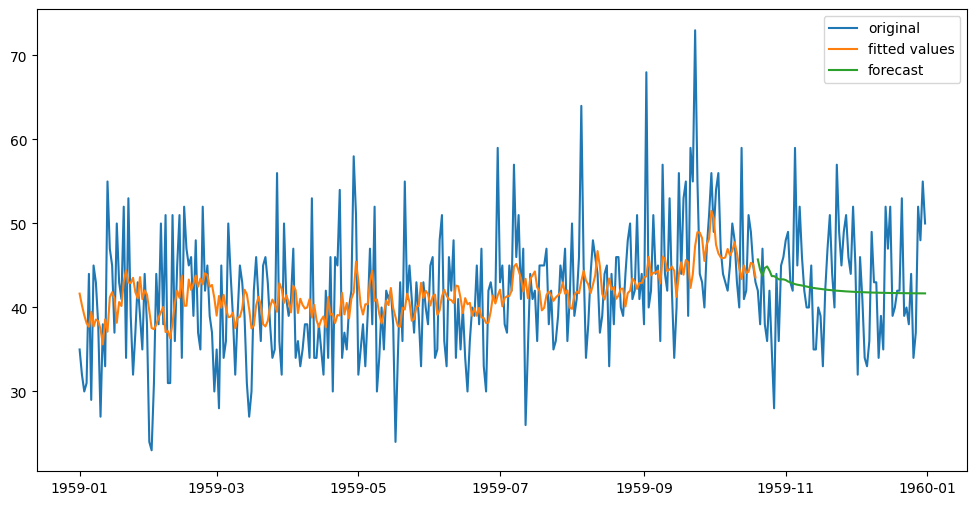

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data.index,data['Births'],label='original')
plt.plot(data.index,data['ARIMA(7,1) fitted values'],label='fitted values')
plt.plot(data.index,data['ARIMA(7,1) forecast'],label='forecast')
plt.legend()

# arima (7,1) handles fluctuations better than previous arima model

# ***AR***

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
help(AutoReg)

In [ ]:
ar_model_ = AutoReg(train['Births'],lags=7,seasonal=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
ar_model_fit = ar_model_.fit()

In [ ]:
ar_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 Births   No. Observations:                  292
Model:               Seas. AutoReg(7)   Log Likelihood                -953.651
Method:               Conditional MLE   S.D. of innovations              6.870
Date:                Wed, 28 Aug 2024   AIC                           1937.302
Time:                        18:26:49   BIC                           1992.089
Sample:                    01-08-1959   HQIC                          1959.265
                         - 10-19-1959                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.3589      4.567      4.238      0.000      10.407      28.311
s(2,7)        -0.4009      1.558     -0.257      0.797      -3.455       2.653
s(3,7)        -1.0012      1.608     -0.623      0.533      -4.152       2.150
s(4,7)        -3.7131      1.617     -2.297      0.022      -6.882      -0.544
s(5,7)        -2.3192      1.617     -1.434      0.152      -5.489       0.850
s(6,7)         2.4166      1.617      1.495      0.135      -0.752       5.585
s(7,7)         1.3972      1.571      0.889      0.374      -1.683       4.477
Births.L1      0.1242      0.059      2.114      0.034       0.009       0.239
Births.L2      0.0996      0.059      1.692      0.091      -0.016       0.215
Births.L3      0.0589      0.059      1.002      0.317      -0.056       0.174
Births.L4      0.0601      0.059      1.020      0.308      -0.055       0.176
Births.L5      0.0749      0.059      1.273      0.203      -0.040       0.190
Births.L6      0.0098      0.059      0.167      0.867      -0.105       0.125
Births.L7      0.1248      0.059      2.131      0.033       0.010       0.240
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1568           -0.0000j            1.1568           -0.0000
AR.2            0.8503           -1.1098j            1.3982           -0.1459
AR.3            0.8503           +1.1098j            1.3982            0.1459
AR.4           -1.1970           -0.5989j            1.3385           -0.4262
AR.5           -1.1970           +0.5989j            1.3385            0.4262
AR.6           -0.2710           -1.3802j            1.4065           -0.2809
AR.7           -0.2710           +1.3802j            1.4065            0.2809
-----------------------------------------------------------------------------
"""

In [ ]:
ar_model_fit.fittedvalues.shape

(285,)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:441: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


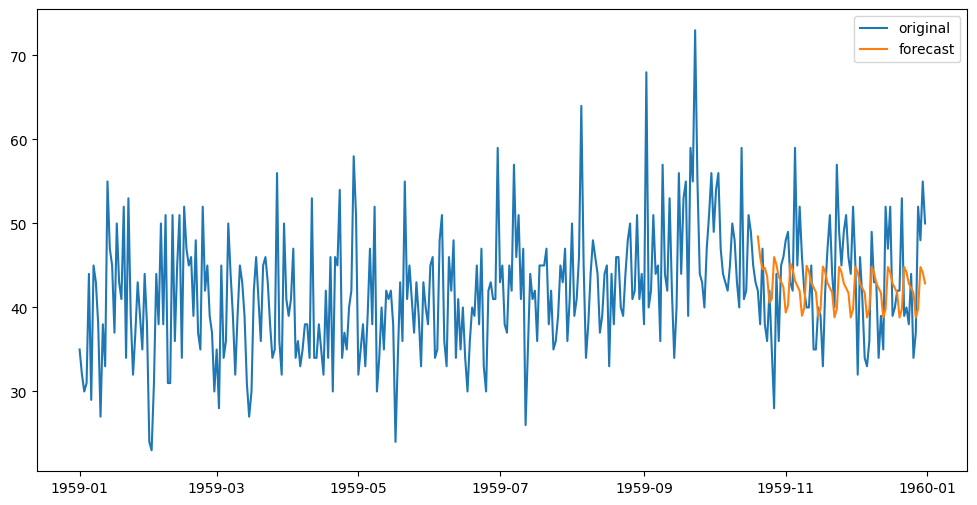

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data.index,data['Births'],label='original')
plt.plot(ar_model_fit.forecast(tsize),label='forecast')
plt.legend()

# *GARCH*

In [ ]:
df = pd.read_csv(r'/content/daily-total-female-births.csv',index_col='Date',parse_dates=True)

In [ ]:
ntest = 62
train = df.iloc[:-ntest]
test = df.iloc[-ntest:]

In [ ]:
train

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

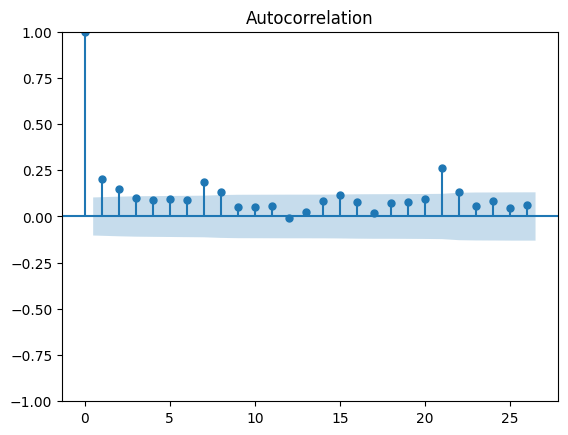

In [ ]:
plot_acf(data['Births']);

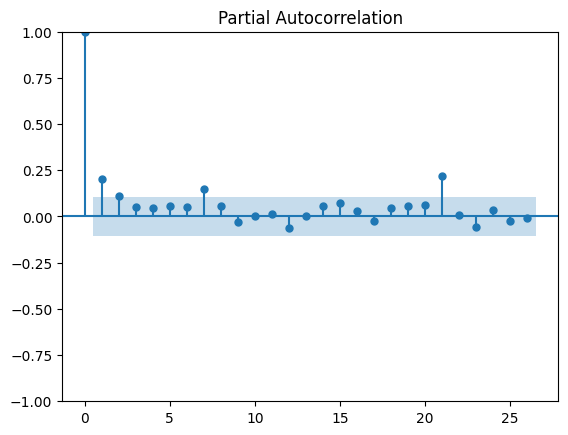

In [ ]:
plot_pacf(data['Births']);

***GARCH***

In [ ]:
from arch import arch_model

In [ ]:
garch_model = arch_model(train,mean='Zero',vol='GARCH',p=1,q=1,dist='gaussian')

In [ ]:
fitted_garch = garch_model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1564.6950877929148
Iteration:      2,   Func. Count:     11,   Neg. LLF: 1565.6421154516718
Iteration:      3,   Func. Count:     17,   Neg. LLF: 1566.5968238192763
Iteration:      4,   Func. Count:     22,   Neg. LLF: 1563.7374932152068
Iteration:      5,   Func. Count:     26,   Neg. LLF: 1563.737488682319
Iteration:      6,   Func. Count:     29,   Neg. LLF: 1563.7374886826456
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1563.737488682319
            Iterations: 6
            Function evaluations: 29
            Gradient evaluations: 6


In [ ]:
fitted_garch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Births   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.003
Vol Model:                      GARCH   Log-Likelihood:               -1563.74
Distribution:                  Normal   AIC:                           3133.47
Method:            Maximum Likelihood   BIC:                           3144.62
                                        No. Observations:                  303
Date:                Tue, Aug 27 2024   Df Residuals:                      303
Time:                        16:57:05   Df Model:                            0
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         35.7769     38.551      0.928      0.353  [-39.781,1.113e+02]
alpha[1]       0.0533  3.674e-02      1.451      0.147 [-1.870e-02,  0.125]
beta[1]        0.9274  5.382e-02     17.232  1.539e-66    [  0.822,  1.033]
===========================================================================

Covariance estimator: robust
"""

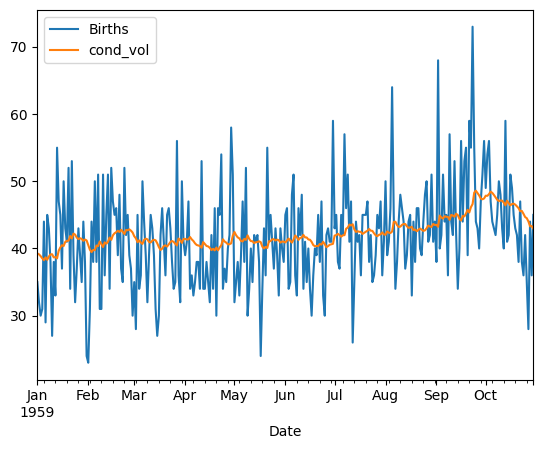

In [ ]:
train['Births'].plot()
fitted_garch.conditional_volatility.plot()
plt.legend()

In [ ]:
train.index[-1]

Timestamp('1959-10-30 00:00:00')

In [ ]:
test.index[0]

Timestamp('1959-10-31 00:00:00')

In [ ]:
forecast_object = fitted_garch.forecast(horizon=ntest,start='1959-10-30',reindex=False)

In [ ]:
df.loc['1959-10-31':,'forecast'] = np.sqrt(forecast_object.variance.loc['1959-10-30'].to_numpy())

<Axes: xlabel='Date'>

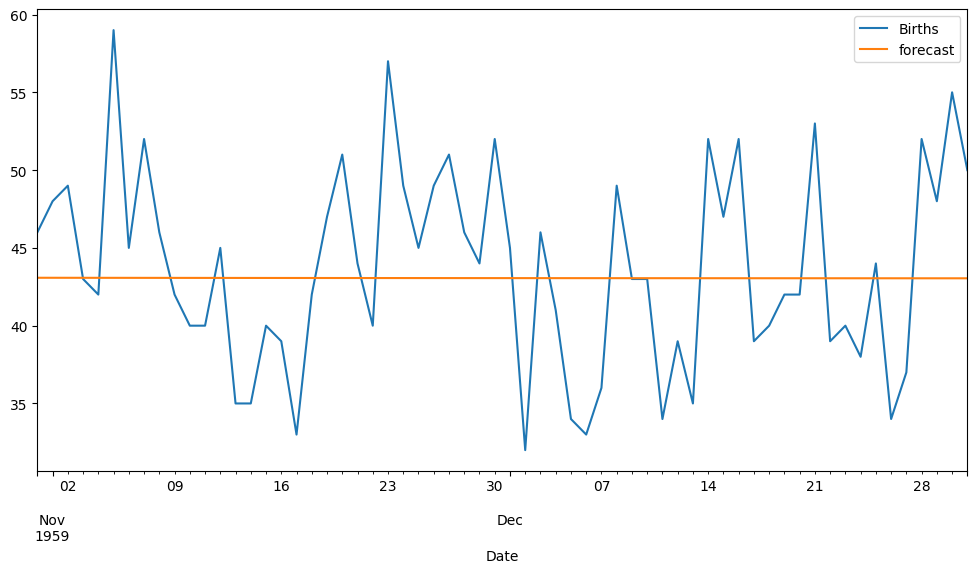

In [ ]:
df.loc['1959-10-31':][['Births','forecast']].plot(figsize=(12,6))

#*ARCH*

In [ ]:
arch = arch_model(train['Births'],mean='Zero',vol='ARCH',p=7,q=1)

In [ ]:
fitted_arch = arch.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 1571.7923607985729
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1566.5046590061033
Iteration:      3,   Func. Count:     30,   Neg. LLF: 1566.5320708789825
Iteration:      4,   Func. Count:     40,   Neg. LLF: 1566.0791198627476
Iteration:      5,   Func. Count:     50,   Neg. LLF: 1564.9406526037874
Iteration:      6,   Func. Count:     60,   Neg. LLF: 1564.5146675274982
Iteration:      7,   Func. Count:     70,   Neg. LLF: 1564.4339284114378
Iteration:      8,   Func. Count:     80,   Neg. LLF: 1564.4230988904146
Iteration:      9,   Func. Count:     90,   Neg. LLF: 1564.319256428973
Iteration:     10,   Func. Count:     99,   Neg. LLF: 1564.3054076262974
Iteration:     11,   Func. Count:    108,   Neg. LLF: 1564.3052604973036
Iteration:     12,   Func. Count:    117,   Neg. LLF: 1564.305253382151
Iteration:     13,   Func. Count:    126,   Neg. LLF: 1564.3052138323426
Iteration:     14,   Func. Count:    135,   Neg. LLF:

In [ ]:
fitted_arch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - ARCH Model Results                        
==============================================================================
Dep. Variable:                 Births   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.003
Vol Model:                       ARCH   Log-Likelihood:               -1563.64
Distribution:                  Normal   AIC:                           3143.28
Method:            Maximum Likelihood   BIC:                           3172.99
                                        No. Observations:                  303
Date:                Tue, Aug 27 2024   Df Residuals:                      303
Time:                        17:01:47   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega        884.7186    191.007      4.632  3.624e-06 [5.104e+02,1.259e+03]
alpha[1]       0.1091  5.562e-02      1.961  4.987e-02   [6.086e-05,  0.218]
alpha[2]       0.0887  5.971e-02      1.485      0.137  [-2.834e-02,  0.206]
alpha[3]       0.0377  5.223e-02      0.723      0.470  [-6.463e-02,  0.140]
alpha[4]       0.0261  5.208e-02      0.502      0.616  [-7.593e-02,  0.128]
alpha[5]       0.0392  5.280e-02      0.742      0.458  [-6.431e-02,  0.143]
alpha[6]       0.0313  5.063e-02      0.618      0.537  [-6.795e-02,  0.131]
alpha[7]       0.1724  5.713e-02      3.018  2.548e-03   [6.043e-02,  0.284]
============================================================================

Covariance estimator: robust
"""

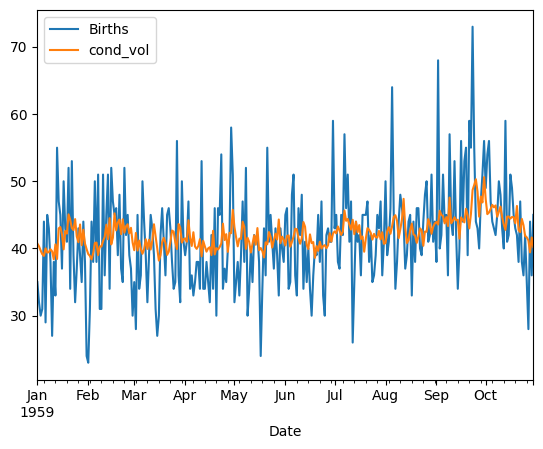

In [ ]:
train['Births'].plot()
fitted_arch.conditional_volatility.plot()
plt.legend()

# increasing p helps to learn fluctuations more than other model

In [ ]:
test.index[0]

Timestamp('1959-10-31 00:00:00')

In [ ]:
fcast = fitted_arch.forecast(horizon=ntest,start='1959-10-30',reindex=False)

In [ ]:
df.loc['1959-10-31':,'arch_forecast'] = np.sqrt(fcast.variance.loc['1959-10-30'].to_numpy())

<Axes: xlabel='Date'>

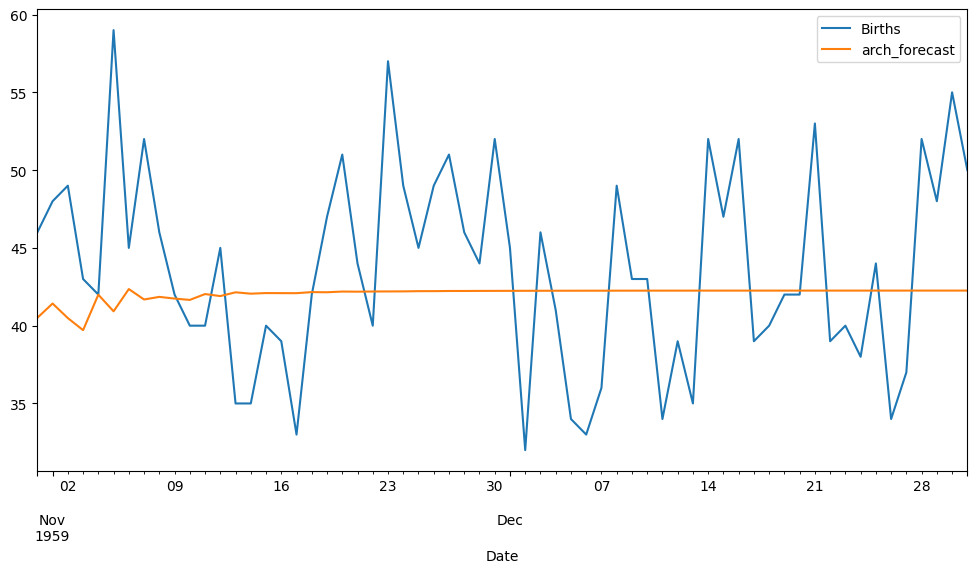

In [ ]:
df.loc['1959-10-31':][['Births','arch_forecast']].plot(figsize=(12,6))

# **LSTM**

In [3]:
dat = pd.read_csv("C:/Users/SHIVAM GHUGE/Downloads/daily-total-female-births.csv",index_col='Date',parse_dates=True)

In [ ]:
dat

In [5]:
# time lags
T = 10

for i in range(1,T+1):
  dat[f'lag_{i}'] = dat['Births'].shift(i)

In [6]:
dat.dropna(inplace=True)

In [ ]:
dat

In [9]:
input_ = dat.drop(columns=['Births'])
target = dat['Births']

In [ ]:
input_

In [ ]:
target

In [12]:
T = 10

samples = input_.shape[0] - T + 1

input_reshape = np.array([input_[i:i+T] for i in range(samples)])

In [13]:
input_reshape.shape

(346, 10, 10)

In [14]:
target = target[T-1:]

In [15]:
t_size = int(0.2*len(dat))

input_train = input_reshape[:-t_size]
input_test = input_reshape[-t_size:]

target_train = target[:-t_size]
target_test = target[-t_size:]

In [16]:
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Dense,Input,LSTM,Dropout
from tensorflow.keras.losses import MeanAbsoluteError

In [17]:
D = input_train.shape[2]

In [36]:
i = Input(shape=(T,D))
x = LSTM(128,return_sequences=True)(i)
x = Dropout(0.1)(x)
x = LSTM(128)(x)
x = Dropout(0.1)(x)

x = Dense(64,activation='relu')(x)
x = Dense(64,activation='relu')(x)
x = Dense(1)(x)

In [37]:
model = Model(i,x)

In [38]:
model.compile(optimizer='adam',loss=MeanAbsoluteError(),metrics=['mse'])

In [39]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 10, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 10, 128)        │        71,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215,233 (840.75 KB)

 Trainable params: 215,233 (840.75 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint

callback = ModelCheckpoint('best_model.keras',monitor='mse',save_best_only=True)

In [ ]:
fitted = model.fit(input_train,target_train,epochs=200,validation_data=(input_test,target_test),callbacks=callback)

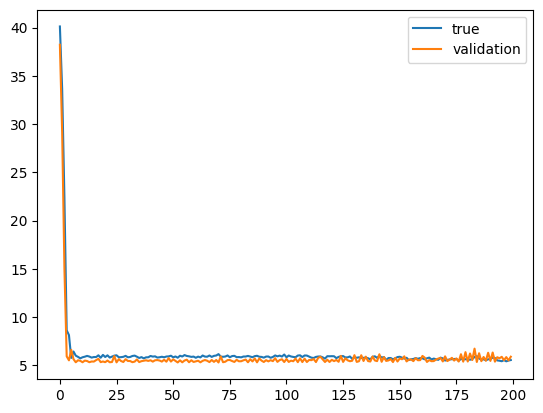

In [41]:
plt.plot(fitted.history['loss'],label='true')
plt.plot(fitted.history['val_loss'],label='validation')
plt.legend()

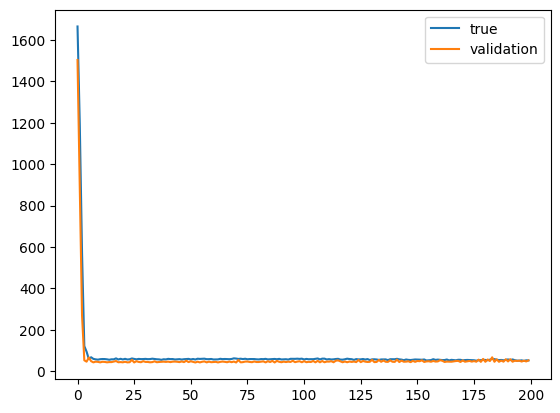

In [42]:
plt.plot(fitted.history['mse'],label='true')
plt.plot(fitted.history['val_mse'],label='validation')
plt.legend()

In [43]:
model.evaluate(input_test,target_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7783 - mse: 50.4132 


[5.8979339599609375, 51.986934661865234]

In [44]:
best_model = load_model('best_model.keras')

In [45]:
best_model.evaluate(input_test,target_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.3362 - mse: 44.7955  


[5.399742603302002, 45.5717658996582]

In [46]:
pred = best_model.predict(input_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


In [47]:
pred.shape

(71, 1)

In [48]:
dat.loc[dat[-t_size:].index,'Forecast'] = pred

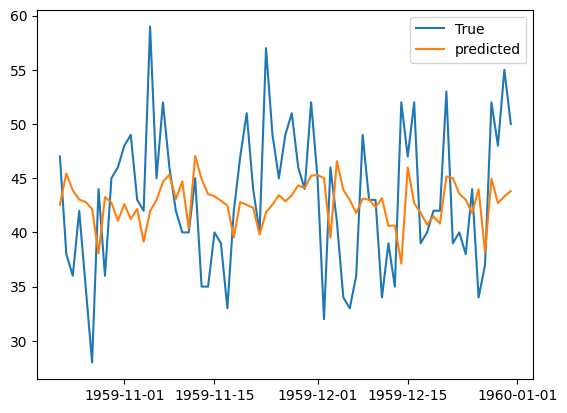

In [49]:
plt.plot(dat.iloc[-t_size:].index,dat.iloc[-t_size:]['Births'],label = 'True')
plt.plot(dat[-t_size:].index,dat.iloc[-t_size:]['Forecast'],label = 'predicted')
plt.legend()

Prediction is not good

In [50]:
from sklearn.metrics import mean_squared_error

mean_squared_error(target_test,pred)**0.5

6.750686262971596